# Baseline corrections

In [1]:
from spectrochempy.api import *


        SpectroChemPy's API
        Version   : 0.1a3.dev
        Copyright : 2014-2017 - LCS (Laboratory for Catalysis and Spectrochempy)
            


In [5]:
source = NDDataset.read_omnic(os.path.join(scpdata, 'irdata', 'NH4Y-activation.SPG'))
source

NDDataset: [[   2.057,    2.061, ...,    2.013,    2.012],
            [   2.033,    2.037, ...,    1.913,    1.911],
            ..., 
            [   1.794,    1.791, ...,    1.198,    1.198],
            [   1.816,    1.815, ...,    1.240,    1.238]] a.u.

<IPython.core.display.Javascript object>


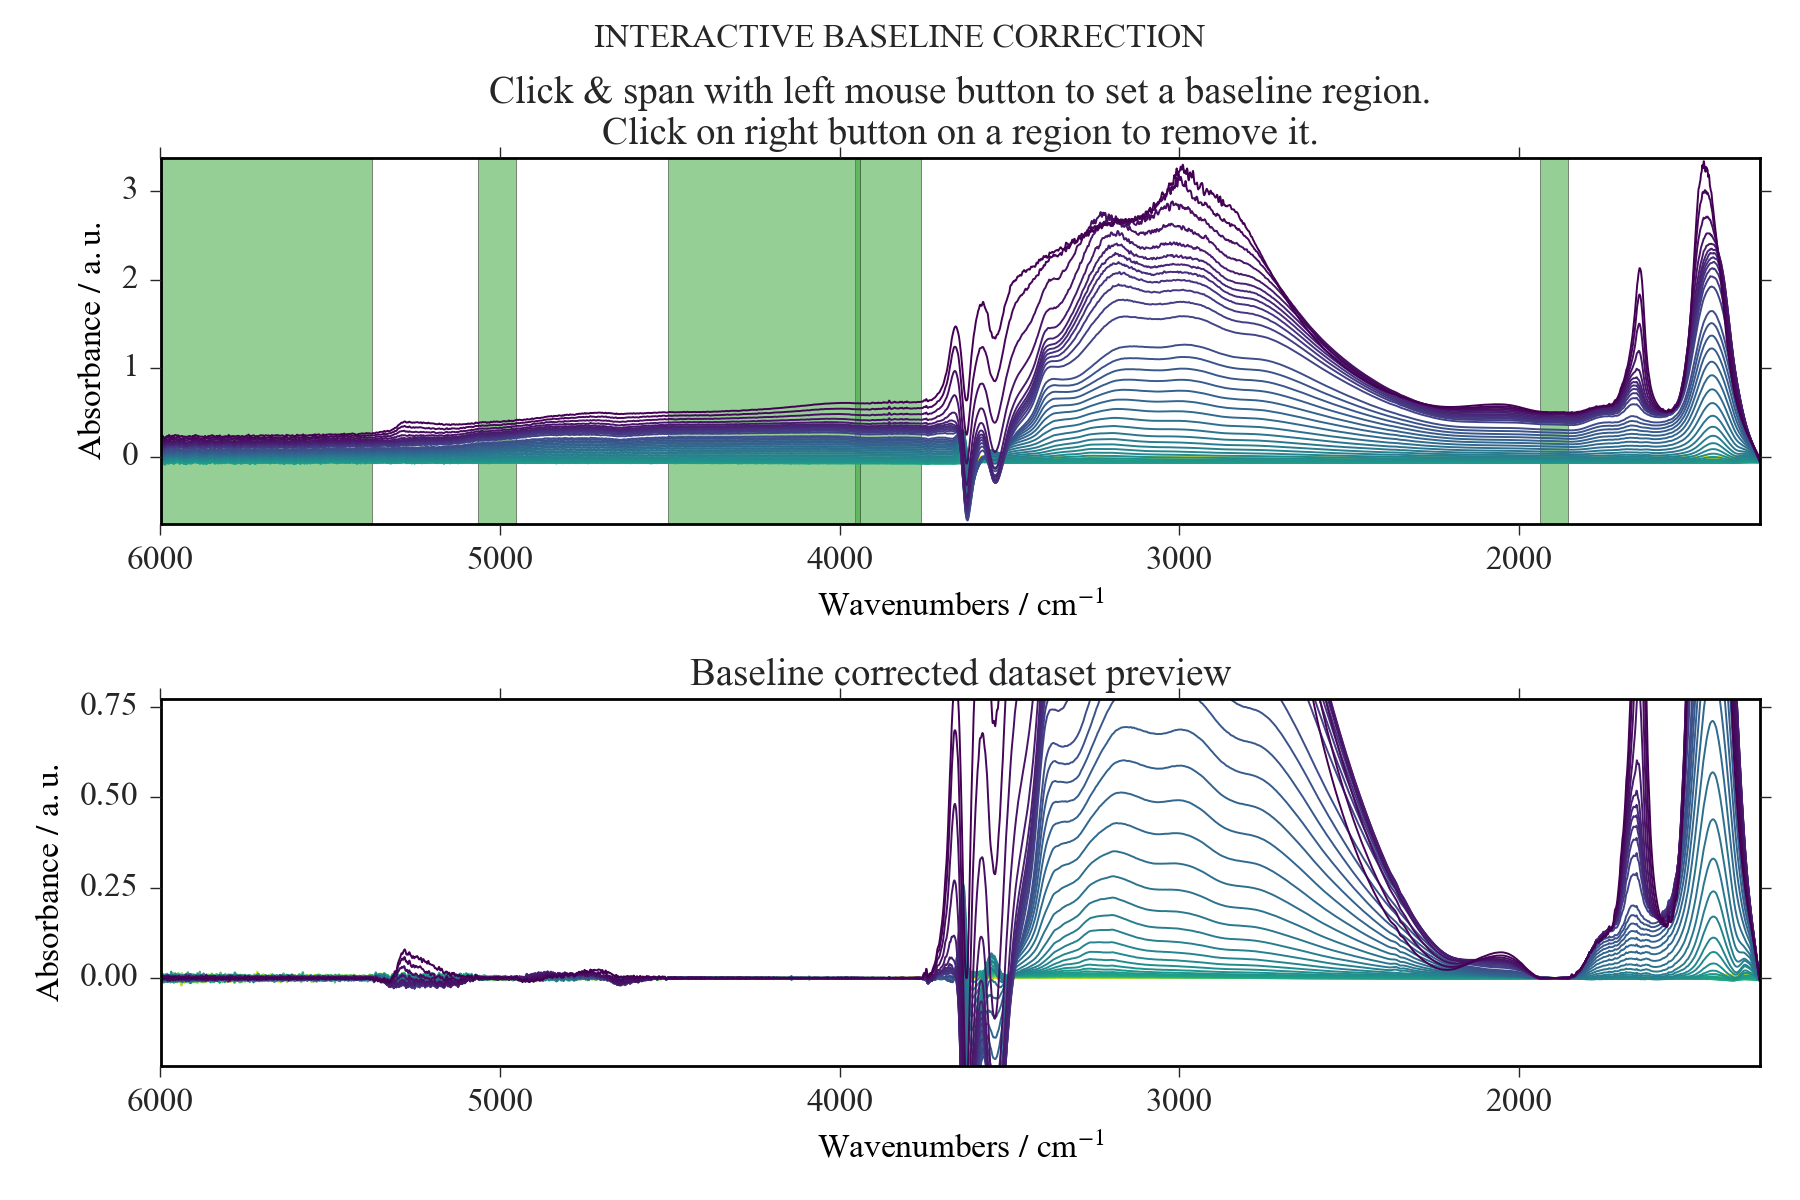

In [13]:
s = source[:, 1290.0:5999.0]  
s = s - s[-1]

# Important note that we use floating point number
# integer would mean points, not wavenumbers!
    
basc = BaselineCorrection(s)

ranges=[]  # no predefined ranges. Autpomatically the first and last points of the spectra 
           # will be taken into account for the baseline
_ = basc.run(*ranges, method='multivariate',
                  interpolation='pchip',
                  npc=5,
                  zoompreview=4)

The regions used to set the baseline are accessible using the `ranges` attibute:

In [14]:
ranges = basc.ranges
ranges

[[5996.6629999999996, 5998.5910000000003],
 [1290.165, 1292.0930000000001],
 [1855.5281877730204, 1937.9635687729597],
 [3760.9930131539368, 3953.2909371610531],
 [5376.6966047704236, 5994.9619622699684],
 [4952.7432167707366, 5064.6198052706541],
 [3939.9656787714835, 4505.2368627710666]]

<IPython.core.display.Javascript object>


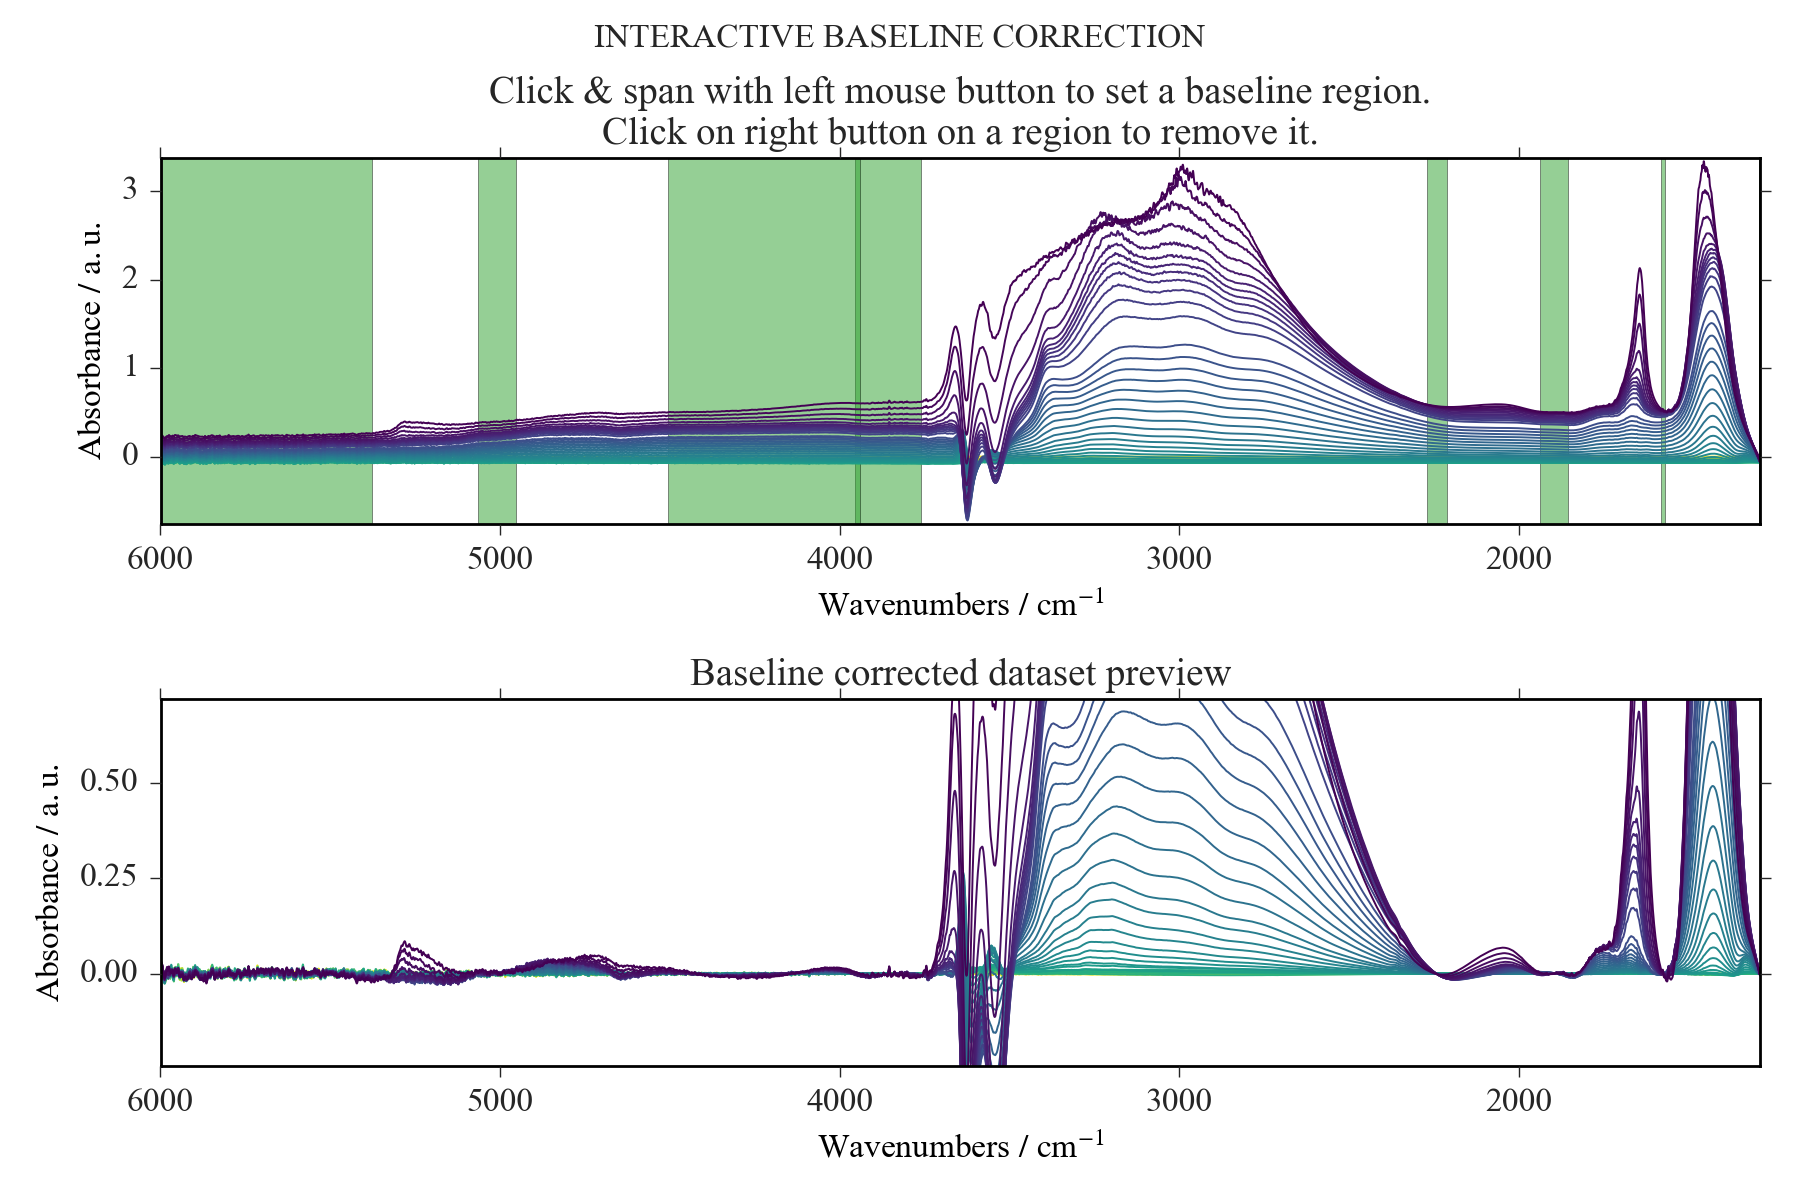

In [21]:
# multivariate with polynomial interpolation
basc1 = BaselineCorrection(s)

# we used the previously set ranges
_ = basc1.run(*ranges, method='sequential',
                  interpolation='polynomial',
                  order=10,
                  zoompreview=4)

Let's takes other available method for baseline corrections:

<IPython.core.display.Javascript object>


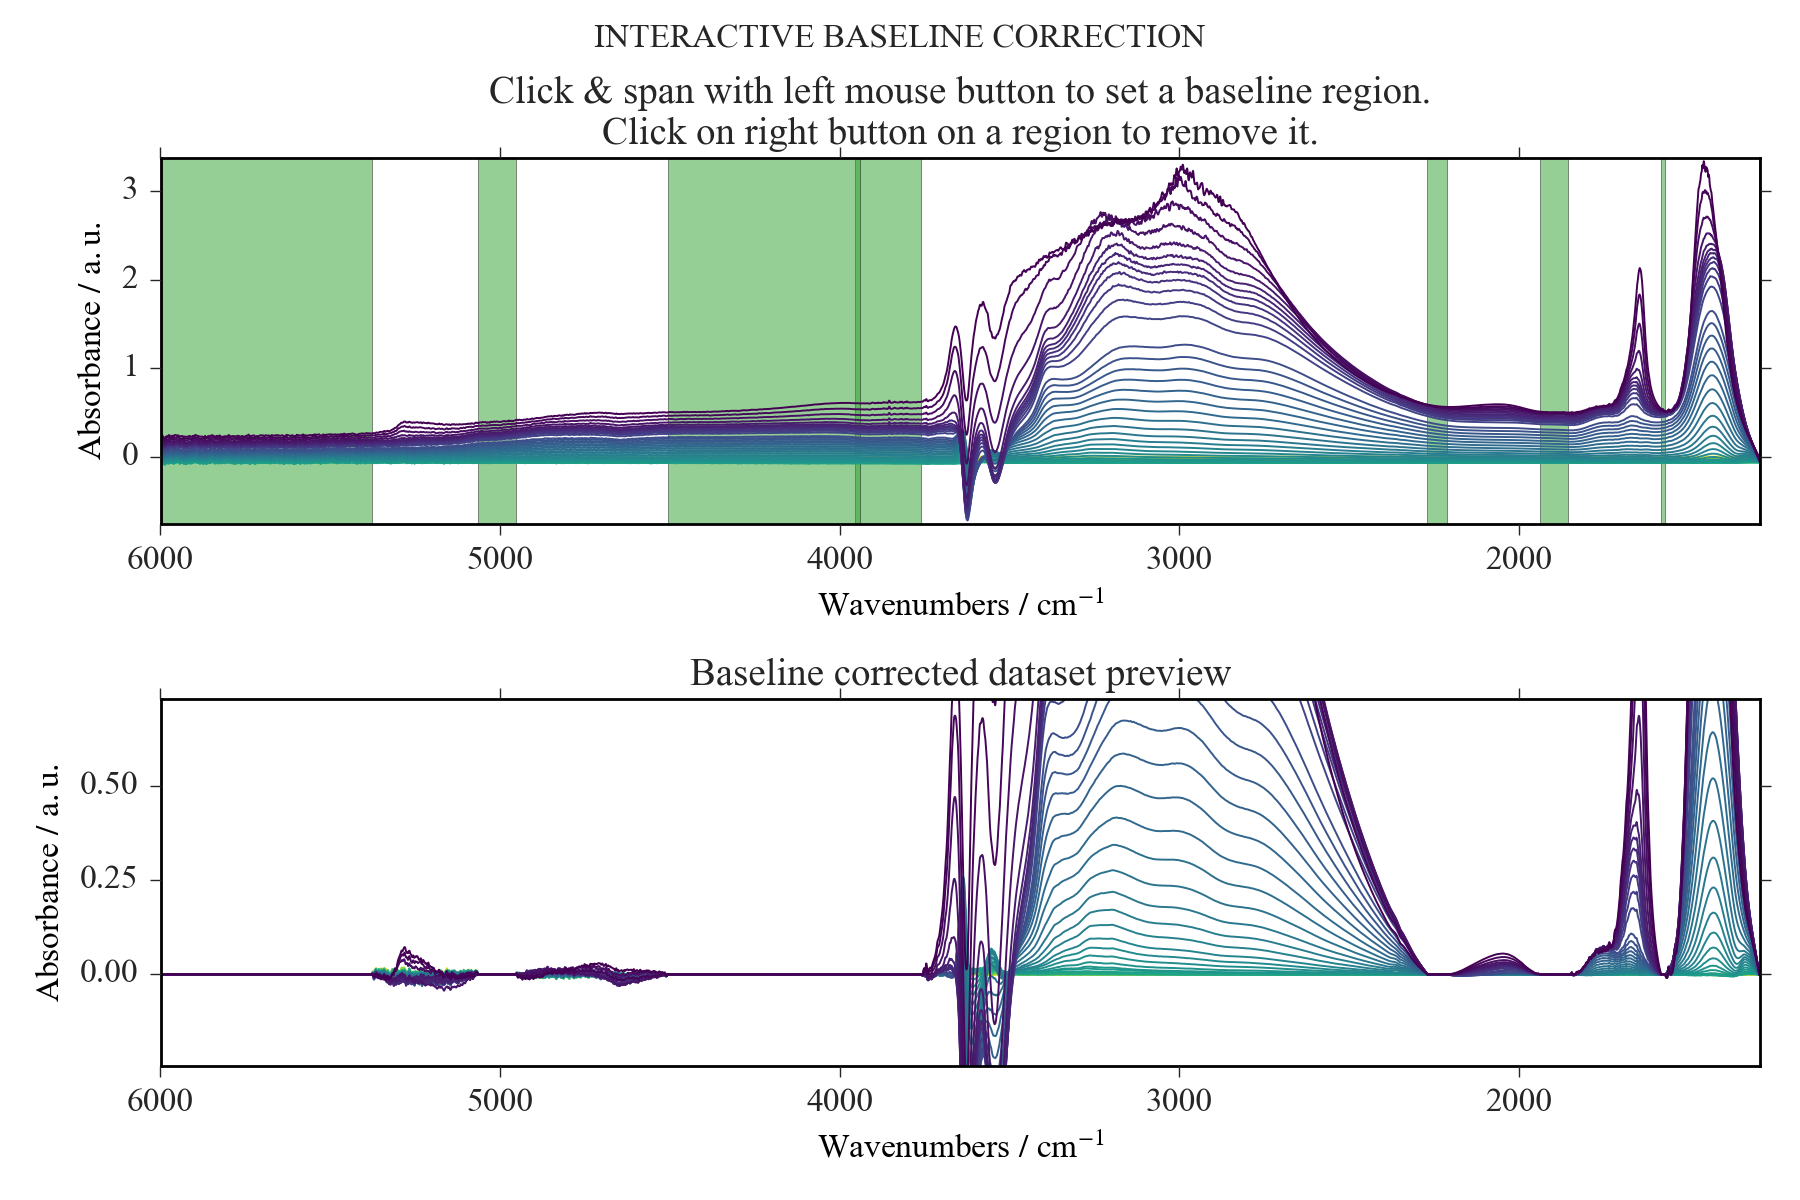

In [18]:
# sequential with pchip interpolation
basc2 = BaselineCorrection(s)

ranges=basc1.ranges  # we used the previously set ranges
_ = basc2.run(*ranges, method='sequential',
                  interpolation='pchip',
                  npc=5,
                  zoompreview=4)

<IPython.core.display.Javascript object>


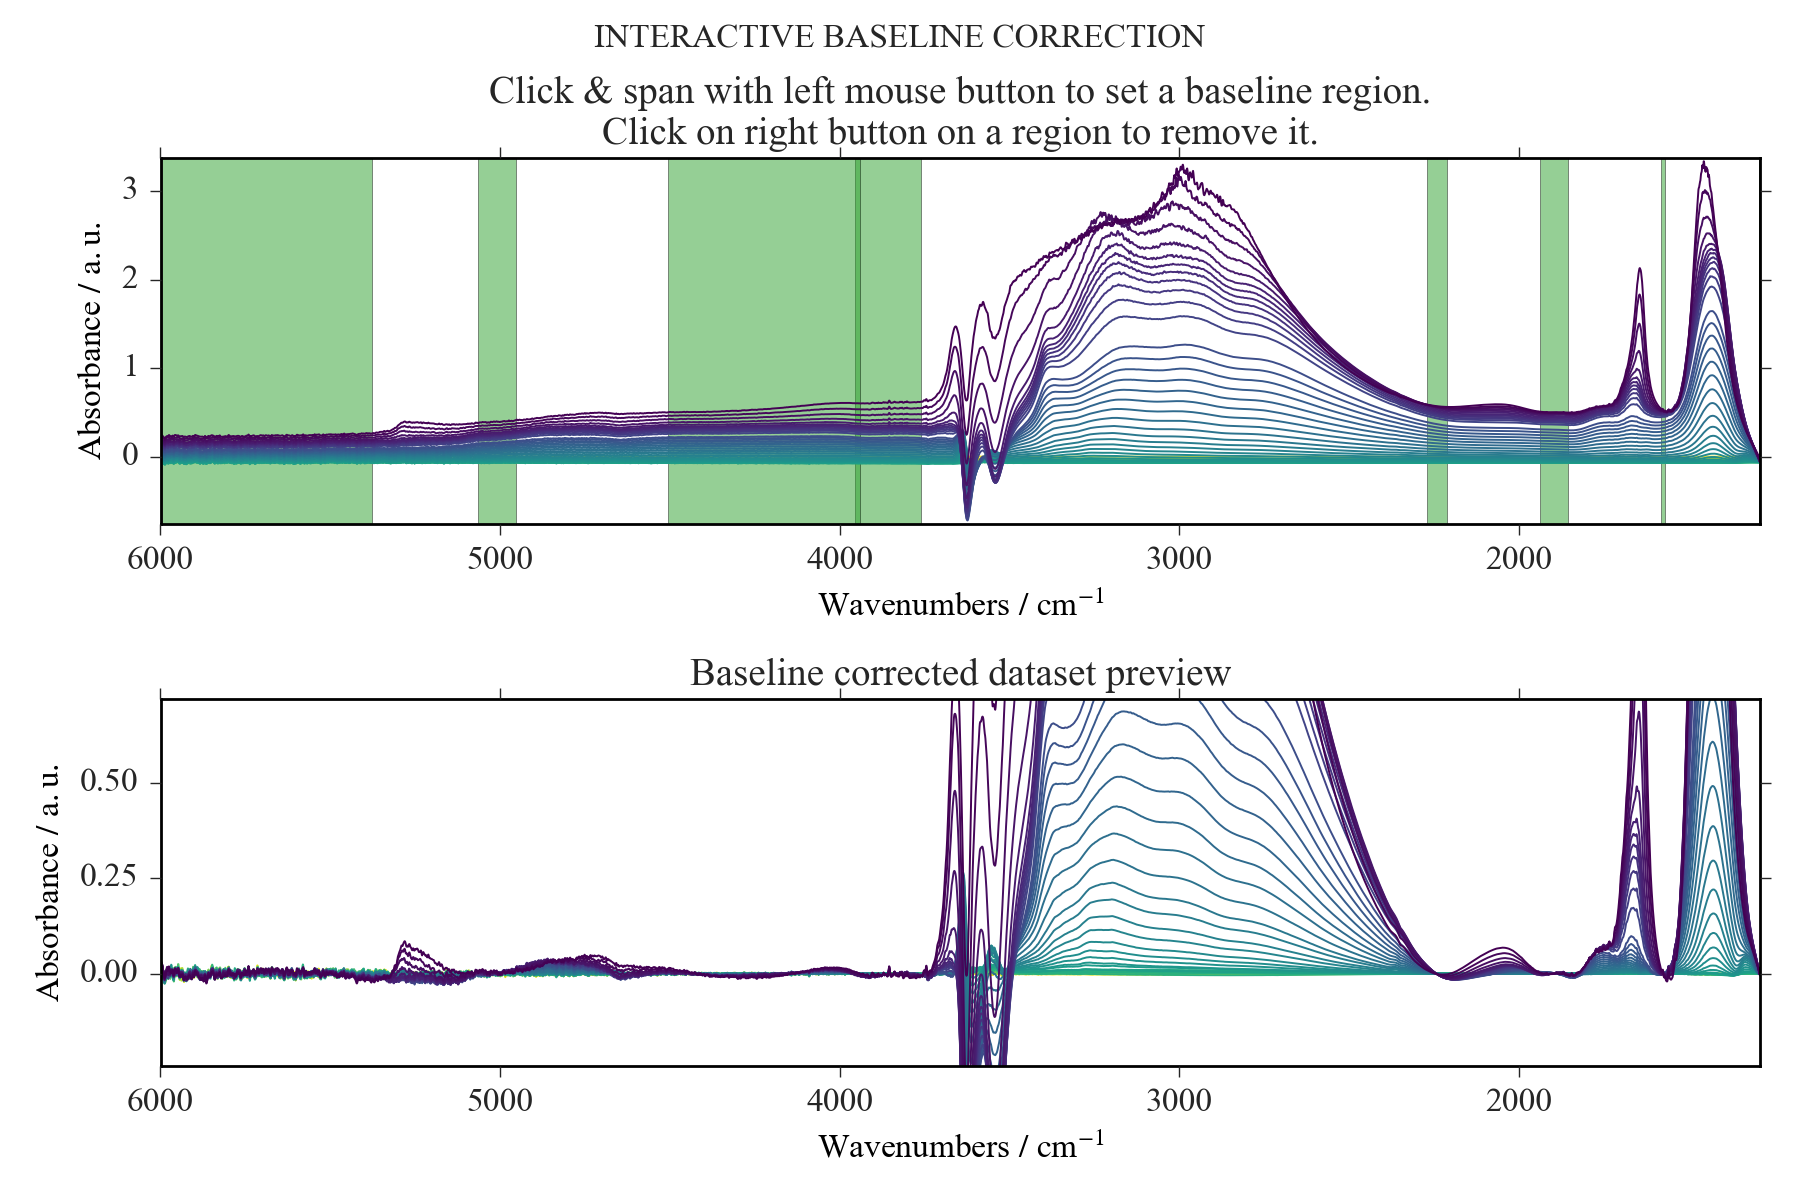

In [20]:
# sequential with polynomial interpolation
basc3 = BaselineCorrection(s)

ranges=basc2.ranges  # we used the previously set ranges
_ = basc3.run(*ranges, method='sequential',
                  interpolation='polynomial',
                  order = 10,
                  zoompreview=4)